In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss
import joblib
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the data
data = pd.read_csv('/content/diabetes.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [38]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# Check the shape of X_scaled
print("Shape of X_scaled:", X_scaled.shape)

Shape of X_scaled: (768, 8)


In [39]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [40]:
# Reshape data for 1D CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [23]:
# Improved 1D CNN model
cnn_model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(128, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=10, validation_split=0.1)

Epoch 1/50
56/56 [==============================] - 3s 14ms/step - loss: 0.6296 - accuracy: 0.6957 - val_loss: 0.6260 - val_accuracy: 0.7581
Epoch 2/50
56/56 [==============================] - 0s 6ms/step - loss: 0.6019 - accuracy: 0.7065 - val_loss: 0.6052 - val_accuracy: 0.7258
Epoch 3/50
56/56 [==============================] - 0s 6ms/step - loss: 0.5647 - accuracy: 0.7319 - val_loss: 0.5529 - val_accuracy: 0.7258
Epoch 4/50
56/56 [==============================] - 0s 5ms/step - loss: 0.5522 - accuracy: 0.7210 - val_loss: 0.5247 - val_accuracy: 0.7581
Epoch 5/50
56/56 [==============================] - 0s 4ms/step - loss: 0.5355 - accuracy: 0.7518 - val_loss: 0.5432 - val_accuracy: 0.6613
Epoch 6/50
56/56 [==============================] - 0s 5ms/step - loss: 0.5485 - accuracy: 0.7409 - val_loss: 0.5768 - val_accuracy: 0.7097
Epoch 7/50
56/56 [==============================] - 0s 5ms/step - loss: 0.5550 - accuracy: 0.7283 - val_loss: 0.5145 - val_accuracy: 0.7581
Epoch 8/50
56/56 [=

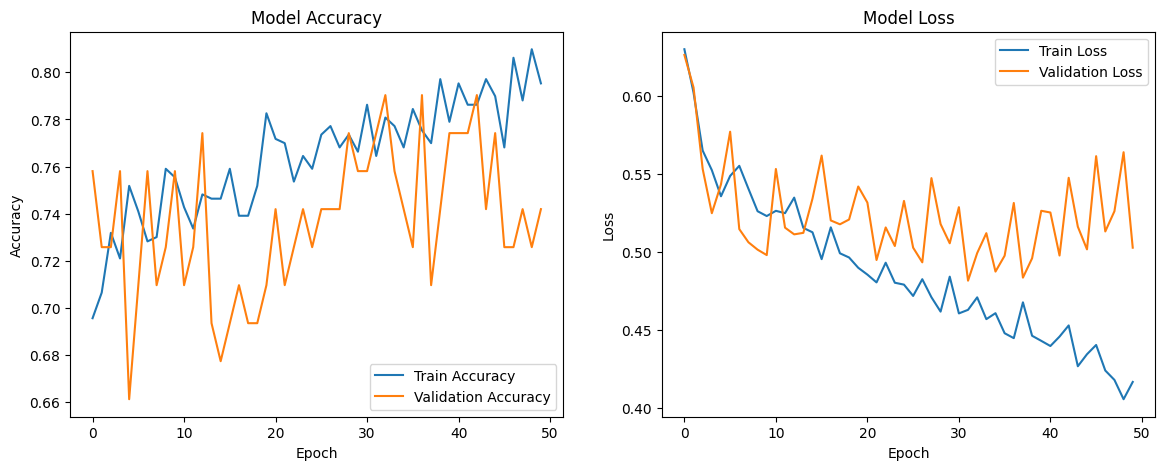

In [25]:
# Plot accuracy and loss history
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [26]:
# Evaluate CNN
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f'CNN Accuracy: {cnn_accuracy}')
print(f'CNN Loss: {cnn_loss}')

5/5 [==============================] - 0s 14ms/step - loss: 0.6047 - accuracy: 0.7273
CNN Accuracy: 0.7272727489471436
CNN Loss: 0.6046754717826843


In [54]:
# Save the CNN model
cnn_model.save('cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# Define the model architecture
model = Sequential()

# Add the layers
model.add(Dense(units=145, activation="relu", input_dim=8, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))  # Adding dropout for regularization

model.add(Dense(units=120, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))  # Adding dropout for regularization

model.add(Dense(units=70, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))  # Adding dropout for regularization

model.add(Dense(units=1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model_his = model.fit(X_train, y_train, validation_split=0.3, batch_size=55, epochs=200, verbose=1)

Epoch 1/200
8/8 [==============================] - 2s 42ms/step - loss: 2.9287 - accuracy: 0.5082 - val_loss: 2.7532 - val_accuracy: 0.6865
Epoch 2/200
8/8 [==============================] - 0s 13ms/step - loss: 2.6373 - accuracy: 0.7133 - val_loss: 2.4956 - val_accuracy: 0.7189
Epoch 3/200
8/8 [==============================] - 0s 12ms/step - loss: 2.3971 - accuracy: 0.7016 - val_loss: 2.2586 - val_accuracy: 0.7081
Epoch 4/200
8/8 [==============================] - 0s 10ms/step - loss: 2.1605 - accuracy: 0.7179 - val_loss: 2.0440 - val_accuracy: 0.7135
Epoch 5/200
8/8 [==============================] - 0s 10ms/step - loss: 1.9617 - accuracy: 0.7319 - val_loss: 1.8509 - val_accuracy: 0.7297
Epoch 6/200
8/8 [==============================] - 0s 11ms/step - loss: 1.7645 - accuracy: 0.7809 - val_loss: 1.6858 - val_accuracy: 0.7189
Epoch 7/200
8/8 [==============================] - 0s 12ms/step - loss: 1.6103 - accuracy: 0.7646 - val_loss: 1.5441 - val_accuracy: 0.7297
Epoch 8/200
8/8 [===

In [50]:
# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.45)

5/5 [==============================] - 0s 7ms/step - loss: 0.6173 - accuracy: 0.7338
Accuracy: [0.6172972917556763, 0.7337662577629089]
5/5 [==============================] - 0s 5ms/step


In [45]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.7207792207792207


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77        99
           1       0.59      0.71      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154



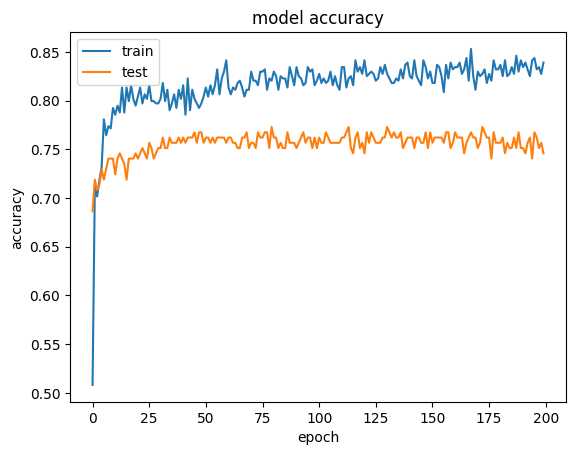

In [49]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_his.history['accuracy'])
plt.plot(model_his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

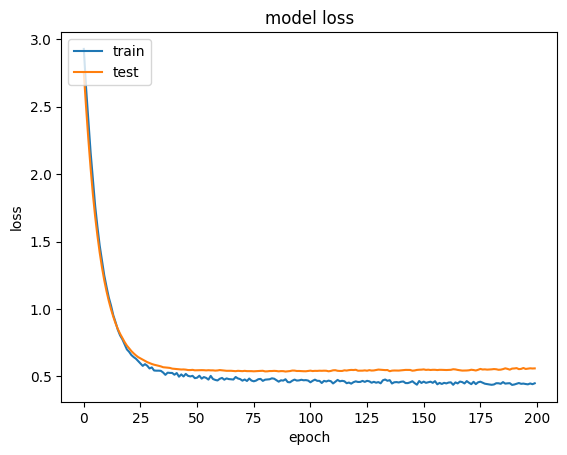

In [51]:
# summarize history for loss
plt.plot(model_his.history['loss'])
plt.plot(model_his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
# Hyperparameter tuning for KNN model
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_cv.fit(X_train, y_train)

# Best parameters for KNN
print(f'Best KNN parameters: {knn_cv.best_params_}')

Best KNN parameters: {'n_neighbors': 23}


In [52]:
from tensorflow.keras.models import load_model
# Save the model to a file
model.save("diabetes")
# Now load the model from the file
model=load_model("diabetes")

In [35]:
# Evaluate KNN with best parameters
y_pred_knn = knn_cv.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_loss = log_loss(y_test, knn_cv.predict_proba(X_test))
print(f'KNN Accuracy: {knn_accuracy}')
print(f'KNN Loss: {knn_loss}')

KNN Accuracy: 0.7532467532467533
KNN Loss: 0.9504495018171998


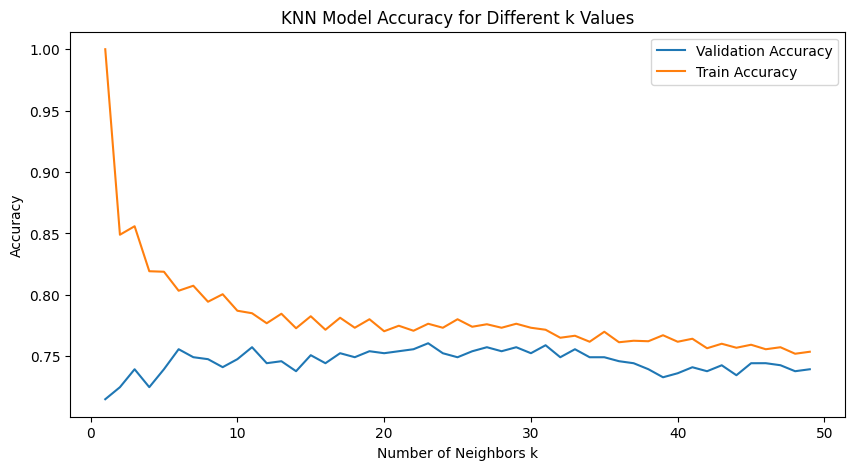

In [36]:
# Plot KNN accuracy for different k values
plt.figure(figsize=(10, 5))
plt.plot(param_grid['n_neighbors'], knn_cv.cv_results_['mean_test_score'], label='Validation Accuracy')

if 'mean_train_score' in knn_cv.cv_results_:
    plt.plot(param_grid['n_neighbors'], knn_cv.cv_results_['mean_train_score'], label='Train Accuracy')
else:
    # Manually compute train scores if not available
    train_scores = []
    for k in param_grid['n_neighbors']:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_scores.append(knn.score(X_train, y_train))
    plt.plot(param_grid['n_neighbors'], train_scores, label='Train Accuracy')

plt.title('KNN Model Accuracy for Different k Values')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
# Save the KNN model
joblib.dump(knn, 'knn_model.joblib')

['knn_model.joblib']